# 6.7 Creating a Dashboard

## Contents

### I. Import libraries and datasets

### II. Data cleaning

### III. Exploring relationships

### IV. Regression analysis 

### V. Clustering 

### VI. Time series

#### I. Import libraries and datasets

In [95]:
# importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import scipy
import plotly.express as ps
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [75]:
import numpy, scipy, statsmodels, plotly
print(f"NumPy: {numpy.__version__}")
print(f"SciPy: {scipy.__version__}")
print(f"Statsmodels: {statsmodels.__version__}")
print(f"Plotly: {plotly.__version__}")
print(f"pandas: {numpy.__version__}")

NumPy: 2.0.1
SciPy: 1.15.2
Statsmodels: 0.14.4
Plotly: 6.0.1
pandas: 2.0.1


In [77]:
import nbformat
print(nbformat.__version__)

5.10.4


In [7]:
# set path
path = r'/Users/mohammedRusso/Documents/DATA_ANALYST_COURSE/DATA_Immersion_Submissions/Assingment 6/05-2015 Global Cancer Patients'

In [9]:
#import Data
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'life expectancy.csv'), index_col = False)

#### II. Data cleaning

In [11]:
df.shape

(3306, 16)

In [13]:
df.head()

Country Name Country Code                      Region  \
0           Afghanistan          AFG                  South Asia   
1                Angola          AGO          Sub-Saharan Africa   
2               Albania          ALB       Europe & Central Asia   
3               Andorra          AND       Europe & Central Asia   
4  United Arab Emirates          ARE  Middle East & North Africa   

           IncomeGroup  Year  Life Expectancy World Bank  \
0           Low income  2001                      56.308   
1  Lower middle income  2001                      47.059   
2  Upper middle income  2001                      74.288   
3          High income  2001                         NaN   
4          High income  2001                      74.544   

   Prevelance of Undernourishment      CO2  Health Expenditure %  \
0                            47.8    730.0                   NaN   
1                            67.5  15960.0              4.483516   
2                             4.9   3230.0              7.139524   
3                             NaN    520.0              5.865939   
4                             2.8  97200.0              2.484370   

   Education Expenditure %  Unemployment  Corruption  Sanitation    Injuries  \
0                      NaN     10.809000         NaN         NaN  2179727.10   
1                      NaN      4.004000         NaN         NaN  1392080.71   
2                   3.4587     18.575001         NaN   40.520895   117081.67   
3                      NaN           NaN         NaN   21.788660     1697.99   
4                      NaN      2.493000         NaN         NaN   144678.14   

   Communicable  NonCommunicable  
0    9689193.70       5795426.38  
1   11190210.53       2663516.34  
2     140894.78        532324.75  
3        695.56         13636.64  
4      65271.91        481740.70

In [15]:
df.groupby('Country Name')['Life Expectancy World Bank'].mean()


Country Name
Afghanistan       60.829211
Albania           76.570632
Algeria           74.551158
American Samoa          NaN
Andorra                 NaN
                    ...    
Uzbekistan        69.644368
Vanuatu           69.096895
Vietnam           74.601421
Zambia            55.069158
Zimbabwe          51.473000
Name: Life Expectancy World Bank, Length: 174, dtype: float64

In [17]:
#find missing values in every column in the table
df.isnull().sum()

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         188
Prevelance of Undernourishment     684
CO2                                152
Health Expenditure %               180
Education Expenditure %           1090
Unemployment                       304
Corruption                        2331
Sanitation                        1247
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64

In [19]:
# Imputing missing values with appropriate strategies

# Using median imputation for continuous variables
continuous_columns = [
    "Life Expectancy World Bank", 
    "CO2", 
    "Health Expenditure %", 
    "Education Expenditure %", 
    "Unemployment", 
    "Corruption", 
    "Sanitation"
]

for column in continuous_columns:
    df[column].fillna(df[column].median(), inplace=True)

/var/folders/d6/b55202qs51369fgxv1dvzry80000gn/T/ipykernel_48442/3292205041.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


In [21]:
df["Prevelance of Undernourishment"].fillna(df["Prevelance of Undernourishment"].mode()[0], inplace=True)

# Check if there are any missing values left
df.isnull().sum()

/var/folders/d6/b55202qs51369fgxv1dvzry80000gn/T/ipykernel_48442/2360746422.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Prevelance of Undernourishment"].fillna(df["Prevelance of Undernourishment"].mode()[0], inplace=True)


Country Name                      0
Country Code                      0
Region                            0
IncomeGroup                       0
Year                              0
Life Expectancy World Bank        0
Prevelance of Undernourishment    0
CO2                               0
Health Expenditure %              0
Education Expenditure %           0
Unemployment                      0
Corruption                        0
Sanitation                        0
Injuries                          0
Communicable                      0
NonCommunicable                   0
dtype: int64

In [23]:
# Look for duplicate within the dataframe
df_dups = df[df.duplicated()]

In [25]:
df_dups

Empty DataFrame
Columns: [Country Name, Country Code, Region, IncomeGroup, Year, Life Expectancy World Bank, Prevelance of Undernourishment, CO2, Health Expenditure %, Education Expenditure %, Unemployment, Corruption, Sanitation, Injuries, Communicable, NonCommunicable]
Index: []

In [27]:
#check for mixed data types 
for col in df.columns.tolist():
  weird = (df[[col]].map(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

In [29]:
df.describe()

Year  Life Expectancy World Bank  \
count  3306.000000                 3306.000000   
mean   2010.000000                   69.885986   
std       5.478054                    9.153832   
min    2001.000000                   40.369000   
25%    2005.000000                   64.215000   
50%    2010.000000                   72.168500   
75%    2015.000000                   76.474207   
max    2019.000000                   84.356341   

       Prevelance of Undernourishment           CO2  Health Expenditure %  \
count                     3306.000000  3.306000e+03           3306.000000   
mean                         8.974622  1.507206e+05              6.338376   
std                         10.580639  7.552955e+05              2.766417   
min                          2.500000  1.000000e+01              1.263576   
25%                          2.500000  2.182500e+03              4.304727   
50%                          3.700000  1.020500e+04              5.892352   
75%                         11.600000  5.596250e+04              8.001557   
max                         70.900000  1.070722e+07             24.230680   

       Education Expenditure %  Unemployment   Corruption   Sanitation  \
count              3306.000000   3306.000000  3306.000000  3306.000000   
mean                  4.517287      7.709541     2.958863    51.448293   
std                   1.737878      6.002558     0.343254    23.831077   
min                   0.850320      0.100000     1.000000     2.377647   
25%                   3.698569      3.906250     3.000000    39.472910   
50%                   4.371465      5.920000     3.000000    49.317481   
75%                   4.922585      9.500750     3.000000    63.658282   
max                  23.270000     37.250000     4.500000   100.000004   

           Injuries  Communicable  NonCommunicable  
count  3.306000e+03  3.306000e+03     3.306000e+03  
mean   1.318219e+06  4.686289e+06     7.392488e+06  
std    5.214068e+06  1.843727e+07     2.932688e+07  
min    4.304900e+02  3.301600e+02     2.481820e+03  
25%    6.245688e+04  5.776475e+04     3.184758e+05  
50%    2.456910e+05  3.147693e+05     1.350146e+06  
75%    8.465591e+05  2.831636e+06     3.918468e+06  
max    5.563676e+07  2.685646e+08     3.246378e+08

In [31]:
df.dtypes

Country Name                       object
Country Code                       object
Region                             object
IncomeGroup                        object
Year                                int64
Life Expectancy World Bank        float64
Prevelance of Undernourishment    float64
CO2                               float64
Health Expenditure %              float64
Education Expenditure %           float64
Unemployment                      float64
Corruption                        float64
Sanitation                        float64
Injuries                          float64
Communicable                      float64
NonCommunicable                   float64
dtype: object

### III. Exploring relationships

In [33]:
num_var = df.select_dtypes(include=['int', 'float'])

num_var.corr()

Year  Life Expectancy World Bank  \
Year                            1.000000                    0.197006   
Life Expectancy World Bank      0.197006                    1.000000   
Prevelance of Undernourishment -0.121883                   -0.554748   
CO2                             0.022698                    0.122331   
Health Expenditure %            0.091788                    0.288255   
Education Expenditure %         0.033273                    0.154676   
Unemployment                   -0.047735                   -0.064393   
Corruption                     -0.046986                    0.214521   
Sanitation                      0.091929                    0.531233   
Injuries                       -0.005951                   -0.009796   
Communicable                   -0.037286                   -0.220800   
NonCommunicable                 0.018347                    0.040522   

                                Prevelance of Undernourishment       CO2  \
Year                                                 -0.121883  0.022698   
Life Expectancy World Bank                           -0.554748  0.122331   
Prevelance of Undernourishment                        1.000000 -0.080897   
CO2                                                  -0.080897  1.000000   
Health Expenditure %                                 -0.188480  0.111629   
Education Expenditure %                              -0.133588 -0.034503   
Unemployment                                          0.007260 -0.053307   
Corruption                                           -0.122738  0.027343   
Sanitation                                           -0.387820  0.096833   
Injuries                                              0.047538  0.649775   
Communicable                                          0.158613  0.208610   
NonCommunicable                                      -0.000556  0.820508   

                                Health Expenditure %  Education Expenditure %  \
Year                                        0.091788                 0.033273   
Life Expectancy World Bank                  0.288255                 0.154676   
Prevelance of Undernourishment             -0.188480                -0.133588   
CO2                                         0.111629                -0.034503   
Health Expenditure %                        1.000000                 0.325022   
Education Expenditure %                     0.325022                 1.000000   
Unemployment                                0.142998                 0.104396   
Corruption                                  0.029710                 0.195516   
Sanitation                                  0.191410                 0.115641   
Injuries                                   -0.084067                -0.068276   
Communicable                               -0.172014                -0.091097   
NonCommunicable                            -0.043089                -0.067992   

                                Unemployment  Corruption  Sanitation  \
Year                               -0.047735   -0.046986    0.091929   
Life Expectancy World Bank         -0.064393    0.214521    0.531233   
Prevelance of Undernourishment      0.007260   -0.122738   -0.387820   
CO2                                -0.053307    0.027343    0.096833   
Health Expenditure %                0.142998    0.029710    0.191410   
Education Expenditure %             0.104396    0.195516    0.115641   
Unemployment                        1.000000   -0.002963   -0.091307   
Corruption                         -0.002963    1.000000    0.073170   
Sanitation                         -0.091307    0.073170    1.000000   
Injuries                           -0.066098    0.032993   -0.100793   
Communicable                       -0.089442    0.008792   -0.199686   
NonCommunicable                    -0.077549    0.031437   -0.041605   

                                Injuries  Communicable  NonCommunicable  
Year                           -0.005951     

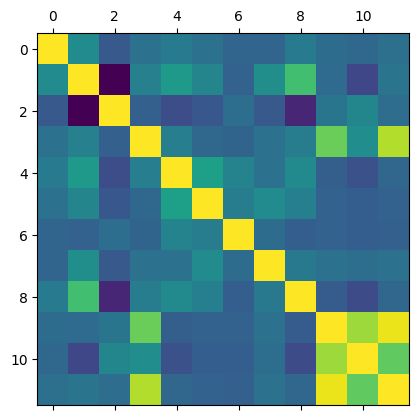

In [35]:
plt.matshow(num_var.corr())

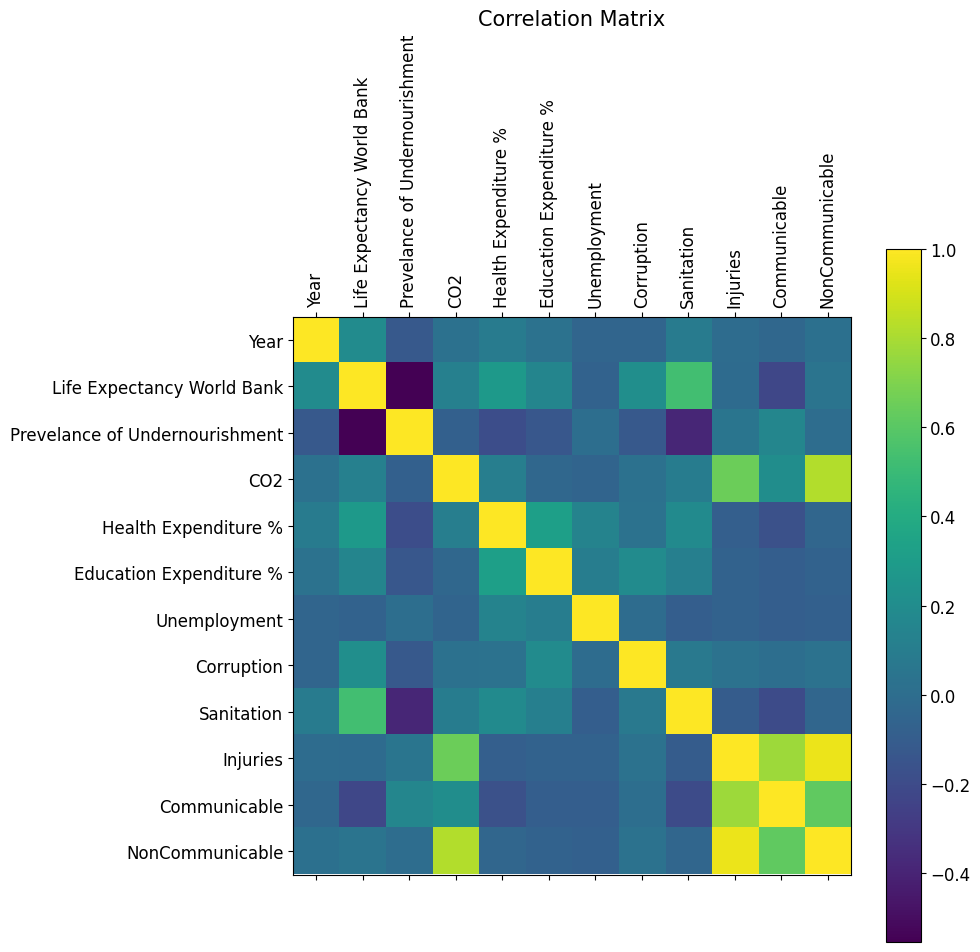

In [37]:
#Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.
#For instance, discard “ID,” “date,” and “index” variables.

# Calculate correlation matrix
corr_matrix = num_var.corr()

# Create figure and plot heatmap
plt.figure(figsize=(9, 9))
plt.matshow(corr_matrix, fignum=0)  # fignum=0 uses the current figure
plt.xticks(range(len(num_var.columns)), num_var.columns, fontsize=12, rotation=90)
plt.yticks(range(len(num_var.columns)), num_var.columns, fontsize=12)

# Add colorbar and title
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=15)

plt.show()

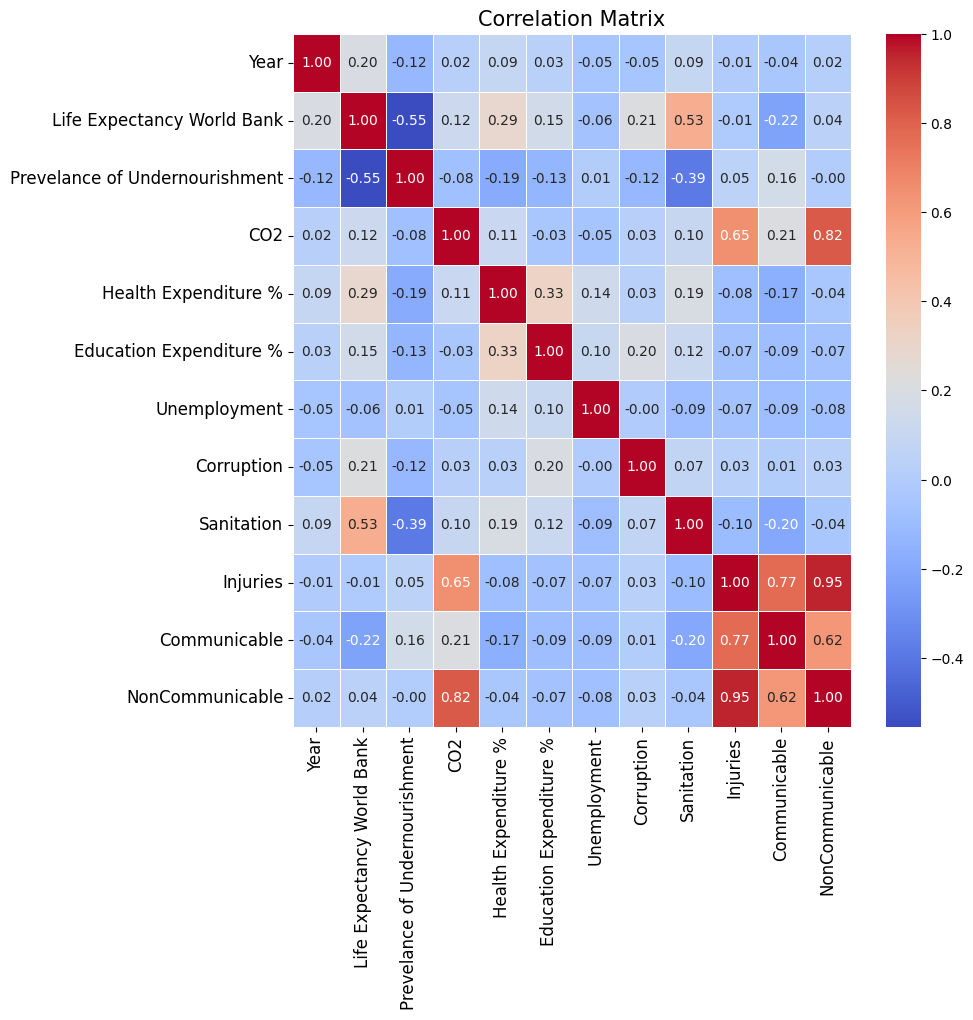

In [39]:
#Create a correlation matrix heatmap (colored).
#Discuss what the coefficients in the plot mean in terms of the relationships between the variables.
plt.figure(figsize=(9, 9))
sns.heatmap(num_var.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation Matrix', fontsize=15)
plt.show()

<Figure size 1000x600 with 0 Axes>

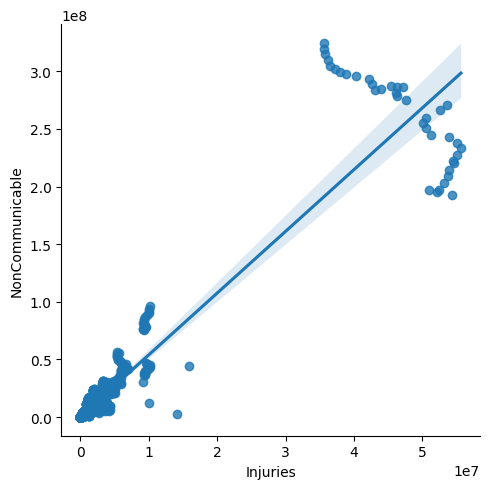

<Figure size 1000x600 with 0 Axes>

In [41]:
# Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
sns.lmplot(x = 'Injuries', y = 'NonCommunicable', data = num_var)
plt.figure(figsize=(10, 6))

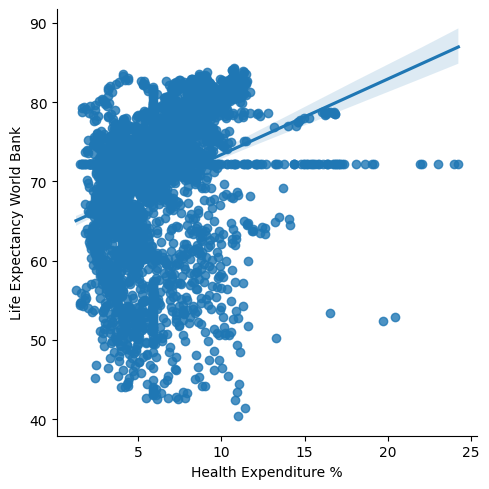

In [43]:
# Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
sns.lmplot(x = 'Health Expenditure %', y = 'Life Expectancy World Bank', data = num_var)

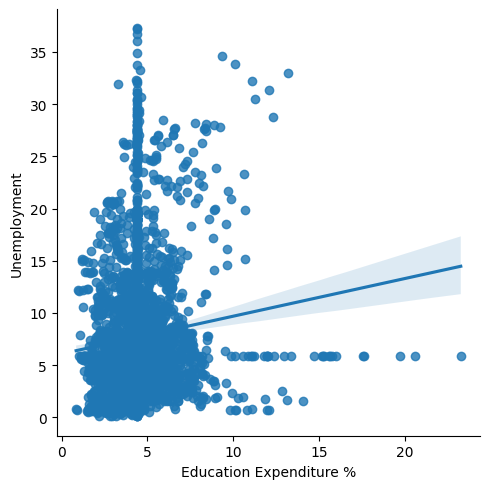

In [45]:
# Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
sns.lmplot(x = 'Education Expenditure %', y = 'Unemployment', data = num_var)

In [47]:
df.columns

Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable'],
      dtype='object')

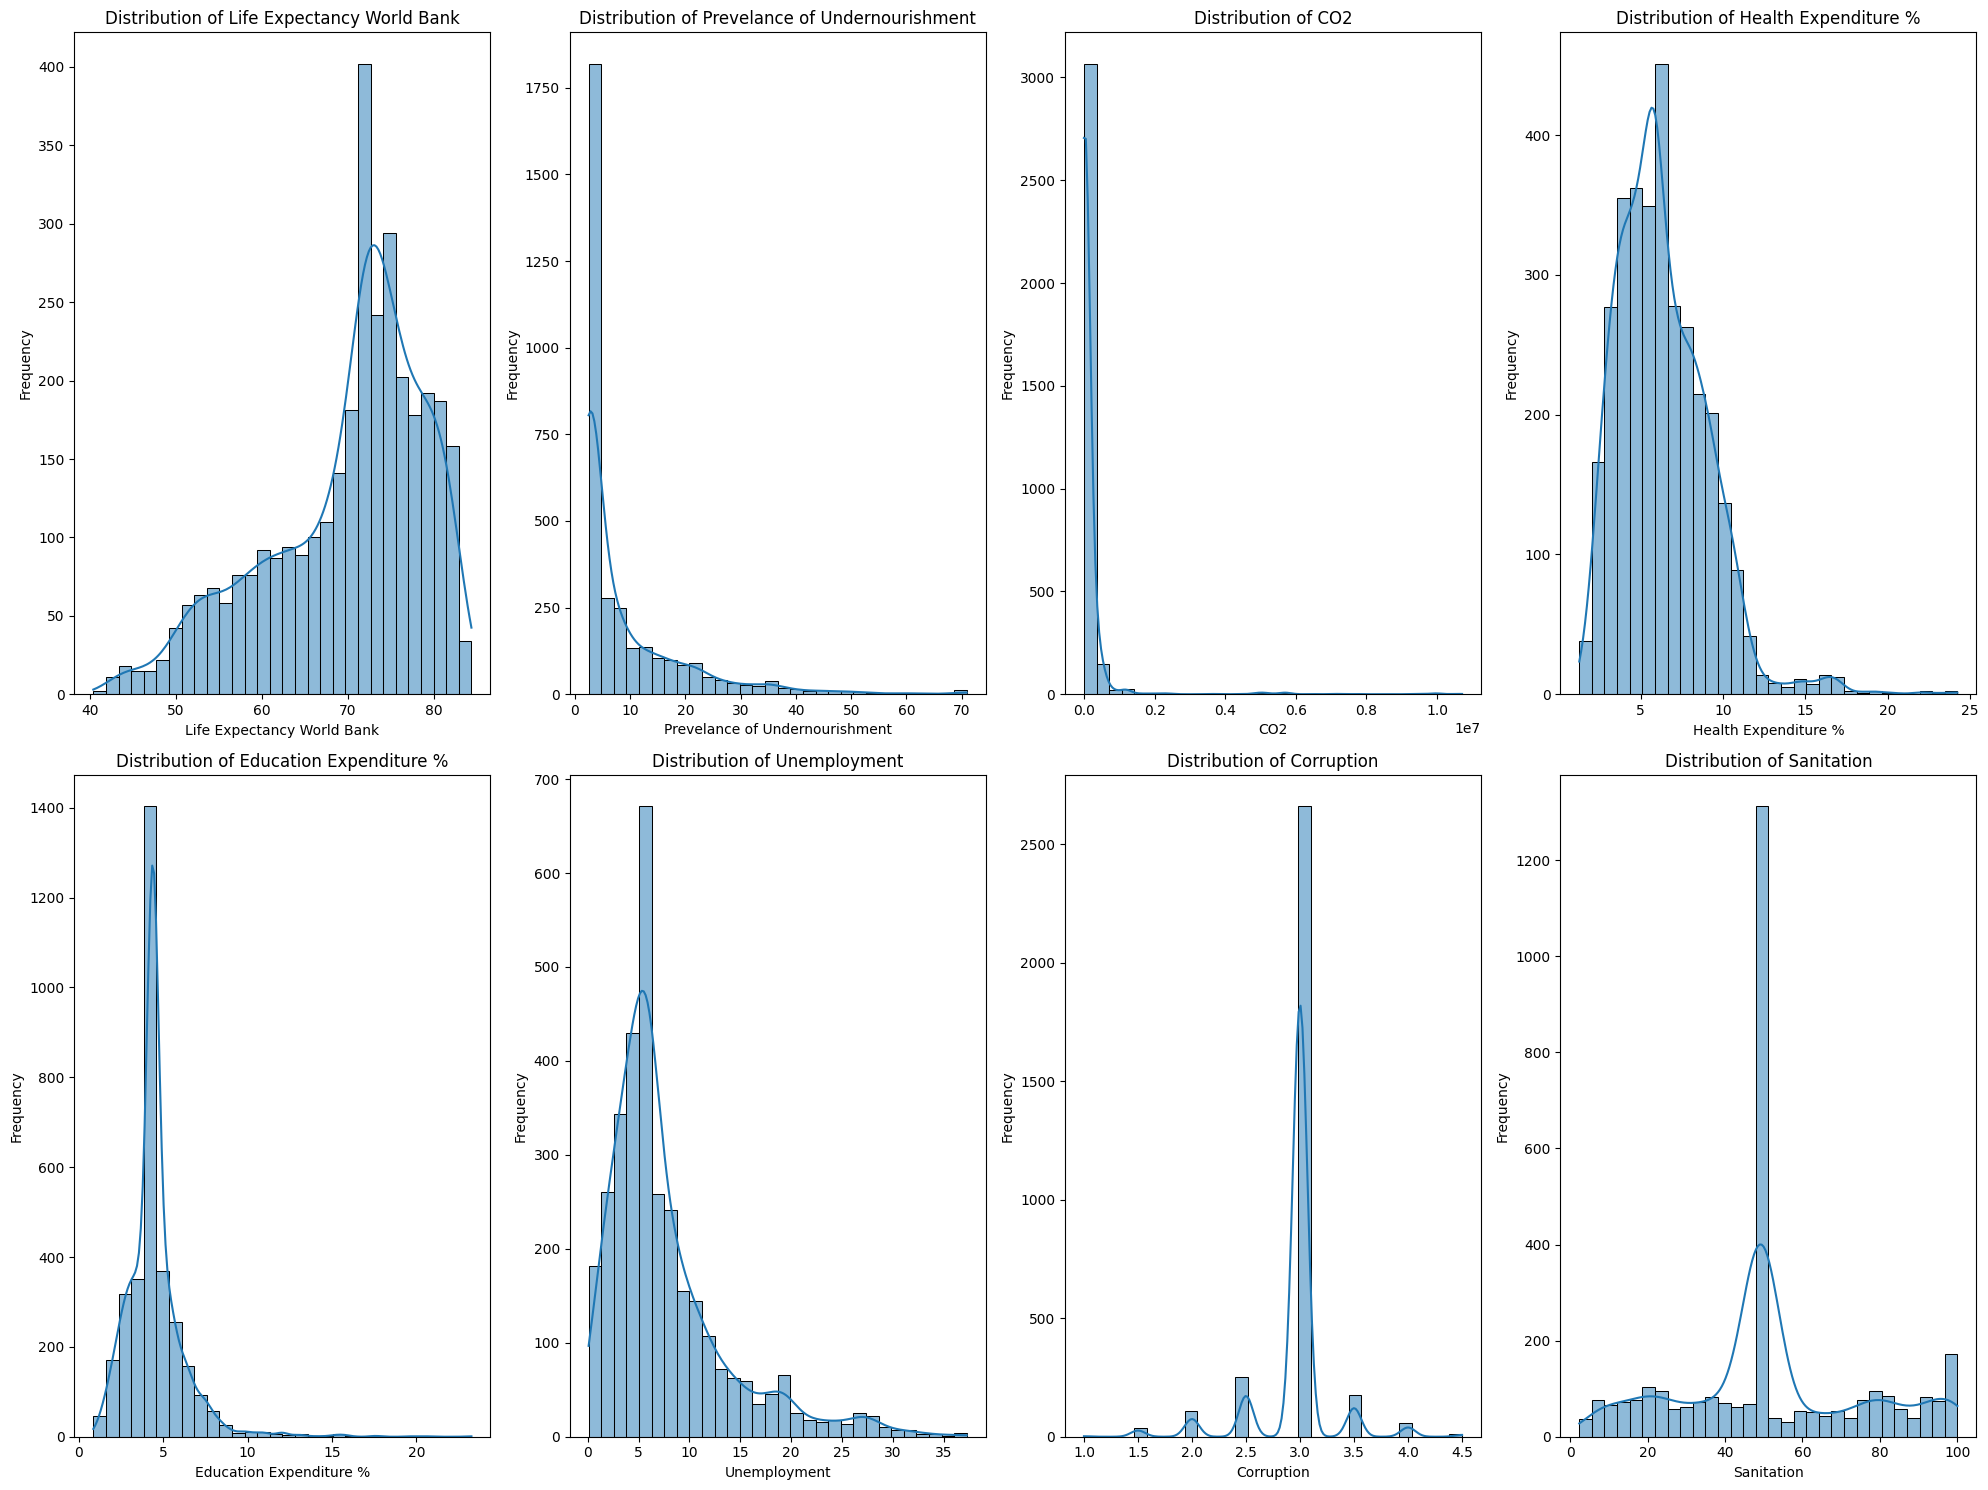

In [49]:
plt.figure(figsize=(20, 15))

features = [
    "Life Expectancy World Bank", 
    "Prevelance of Undernourishment", 
    "CO2", 
    "Health Expenditure %", 
    "Education Expenditure %", 
    "Unemployment", 
    "Corruption", 
    "Sanitation"
]

for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Life Expectancy World Bank: The distribution seems to be bimodal, with two peaks indicating two groups of countries having different average life expectancies.

Prevalence of Undernourishment: Most of the countries have low undernourishment prevalence, but a few countries have very high undernourishment levels.

CO2 Emissions: The distribution is highly skewed to the right, indicating that a few countries have extremely high CO2 emissions compared to others.

Health Expenditure %: The distribution is somewhat normal with a slight right skew, indicating that most countries spend a similar percentage of their GDP on health.

Education Expenditure %: The distribution shows a peak around 4-5%, indicating that most countries spend this percentage of their GDP on education.

Unemployment: The distribution is right-skewed, indicating that while most countries have low unemployment rates, a few have extremely high rates.

Corruption: The distribution shows that most of the data points are clustered around a particular value, indicating potential issues with the corruption index data.

Sanitation: The distribution is bimodal, indicating that countries either have very high or very low sanitation indices.

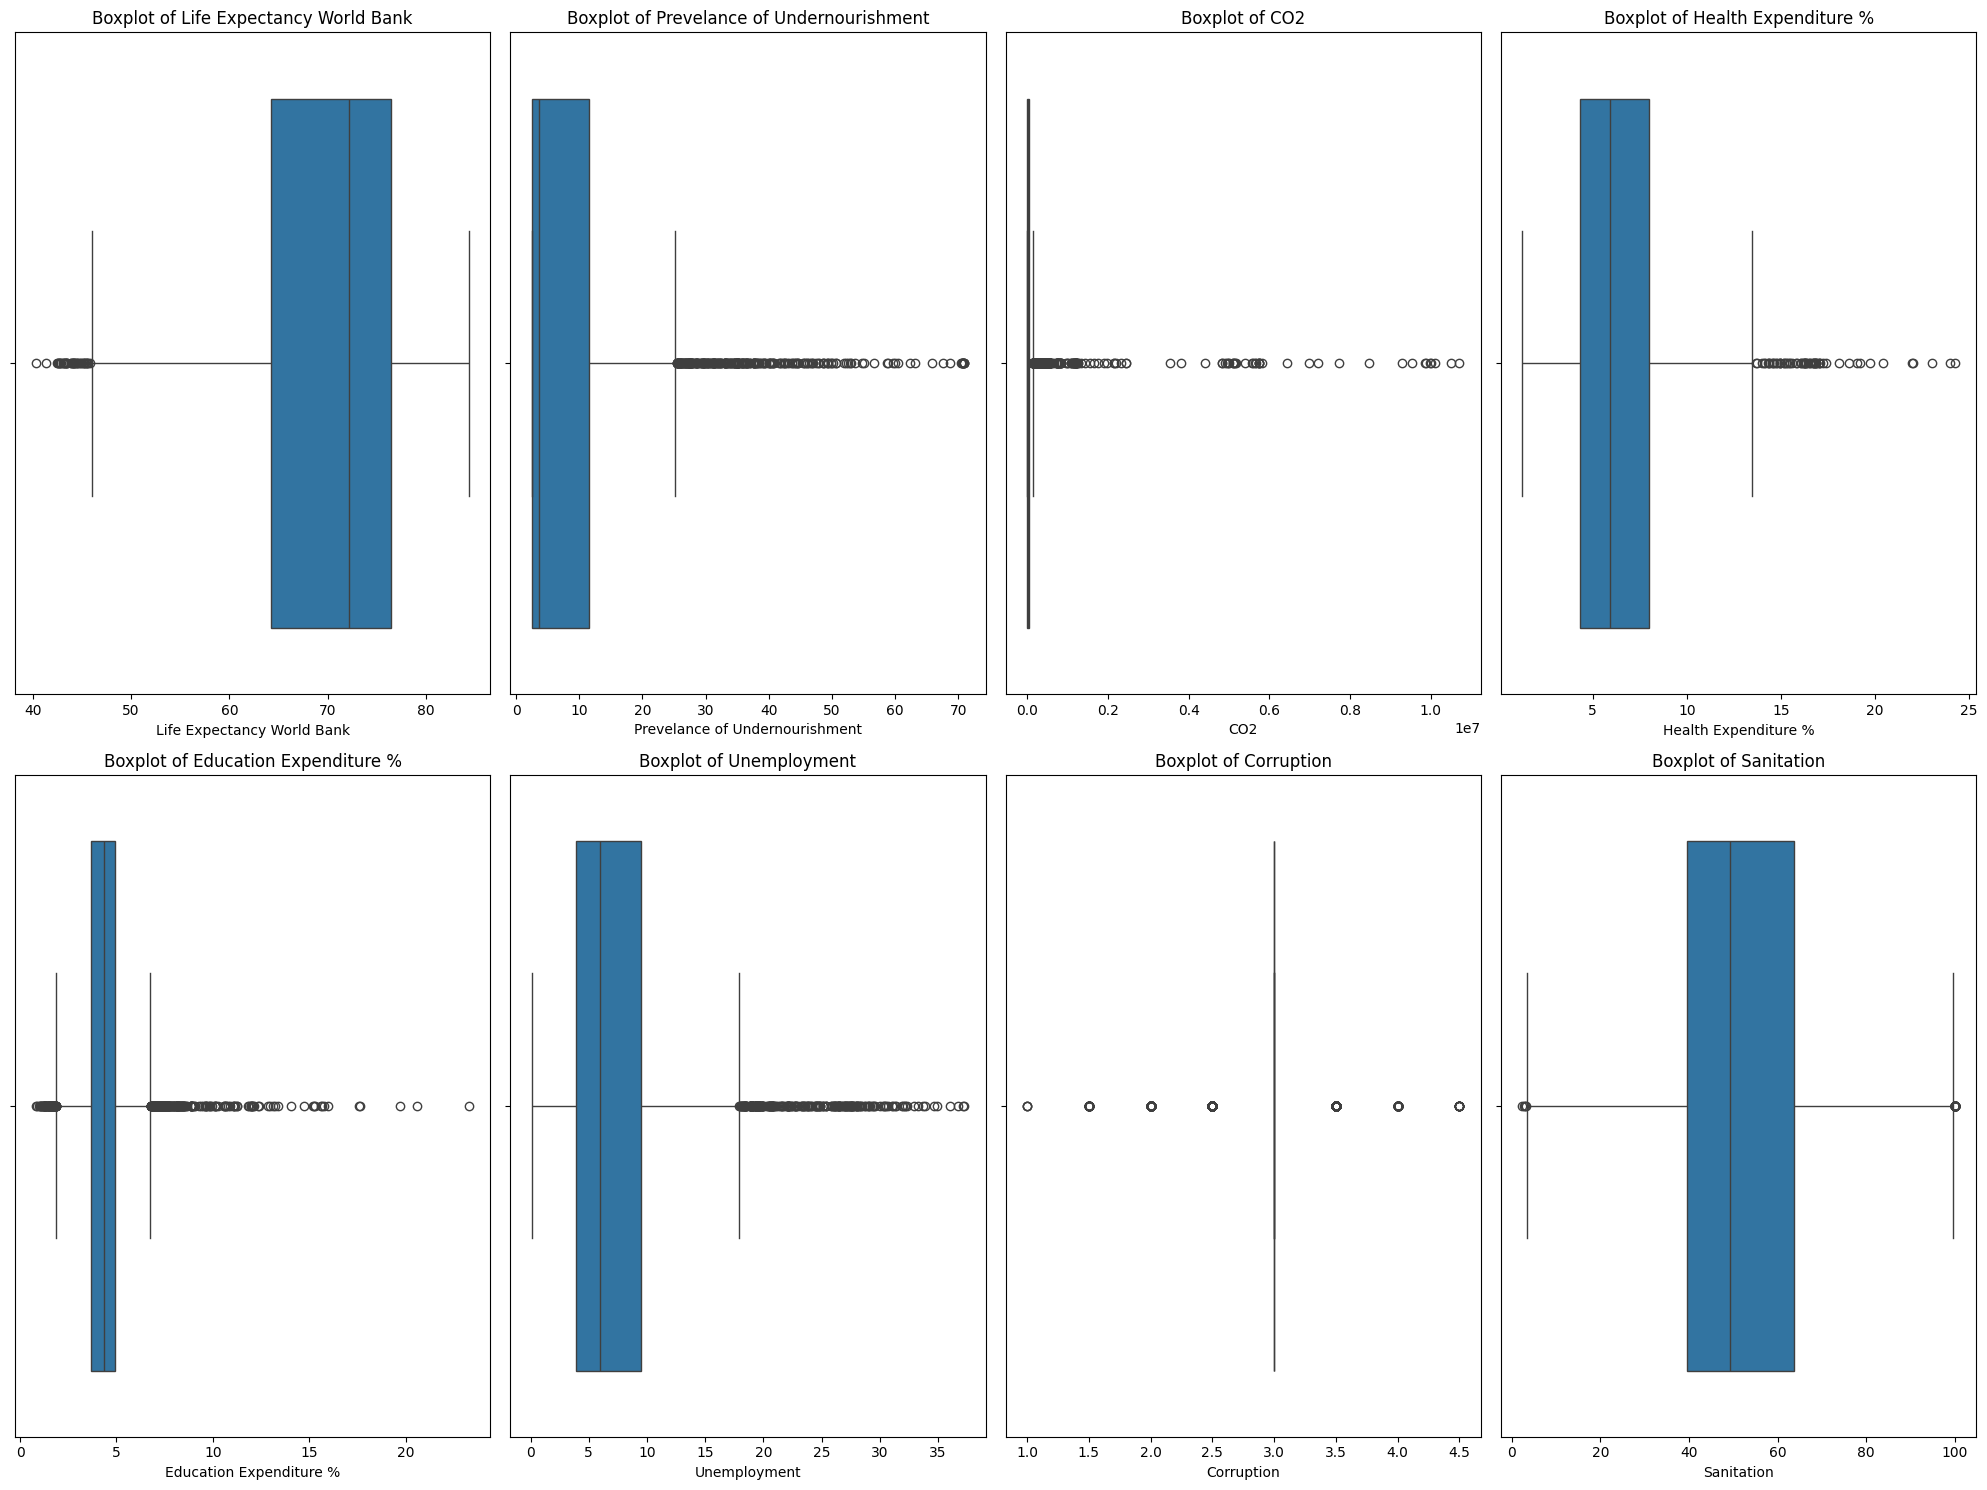

In [52]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}', fontsize=12)
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

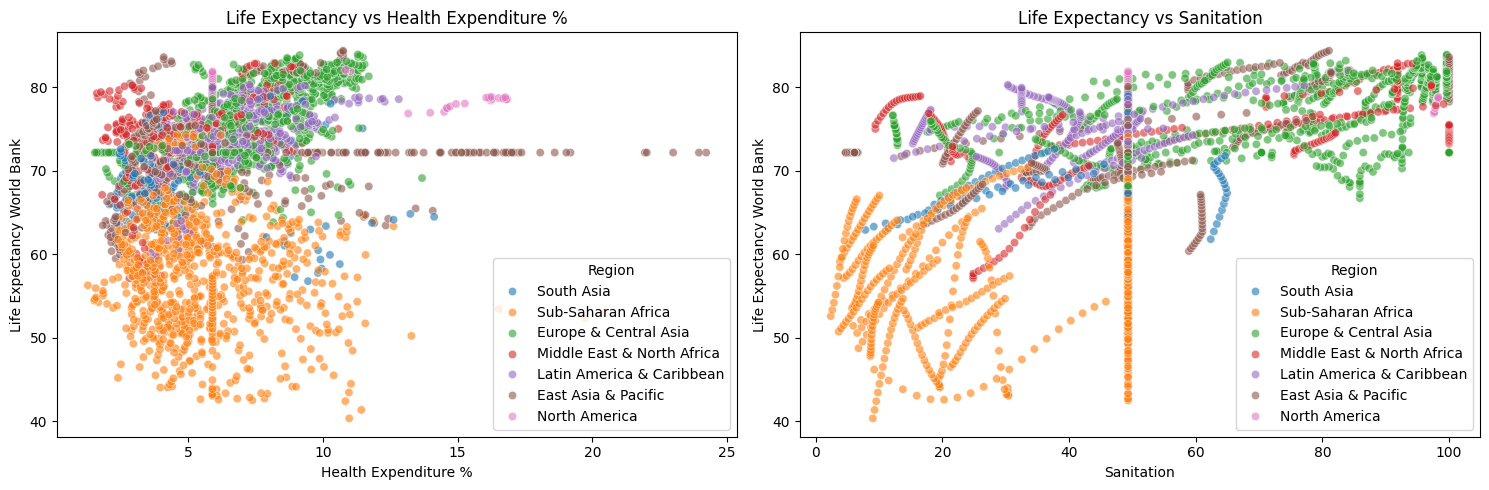

In [54]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# Scatter plot between Life Expectancy and Health Expenditure %
plt.subplot(1, 2, 1)
sns.scatterplot(x='Health Expenditure %', y='Life Expectancy World Bank', data=df, hue='Region', alpha=0.6)
plt.title('Life Expectancy vs Health Expenditure %')

# Scatter plot between Life Expectancy and Sanitation
plt.subplot(1, 2, 2)
sns.scatterplot(x='Sanitation', y='Life Expectancy World Bank', data=df, hue='Region', alpha=0.6)
plt.title('Life Expectancy vs Sanitation')

plt.tight_layout()
plt.show()

1. Life Expectancy vs Health Expenditure %:
This plot shows a positive trend indicating that countries with higher health expenditure tend to have higher life expectancy.
Different regions are depicted in different colors, showing a wide range of health expenditures and life expectancies across regions.
2. Life Expectancy vs Sanitation:
This plot illustrates a strong positive trend where countries with better sanitation facilities tend to have higher life expectancy.
Again, we can observe variations across different regions in terms of sanitation and life expectancy

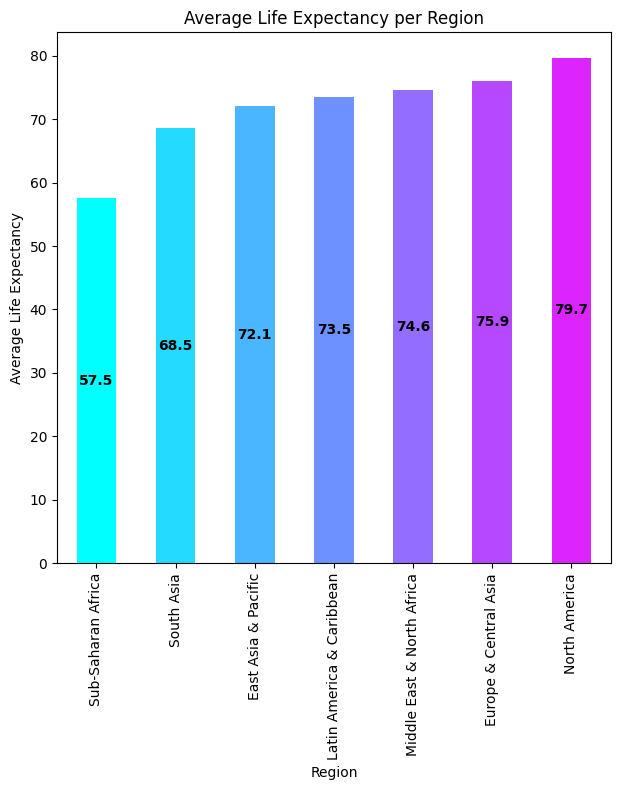

In [57]:

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Bar plot for average life expectancy per region
lf_bar = plt.subplot(1, 2, 1)

# Get region data and number of bars
region_data = df.groupby('Region')['Life Expectancy World Bank'].mean().sort_values()
n_bars = len(region_data)  # Define n_bars here

# Use current colormap syntax
cmap = plt.colormaps['cool']  # Updated from deprecated get_cmap()
colors = [cmap(i / n_bars) for i in range(n_bars)]

# Plot with gradient colors
ax = region_data.plot(kind='bar', color=colors)

# Add value labels inside each bar
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}",
        (p.get_x() + p.get_width() / 2., p.get_height() / 2),
        ha='center',
        va='center',
        color='black',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Average Life Expectancy per Region')
plt.ylabel('Average Life Expectancy')
plt.tight_layout()

# Save the figure
output_path = os.path.join(path, '04 Analysis', 'Visuals', 'bar_avg_lfe_income.png')
plt.savefig(output_path, bbox_inches='tight', dpi=300)
plt.show()


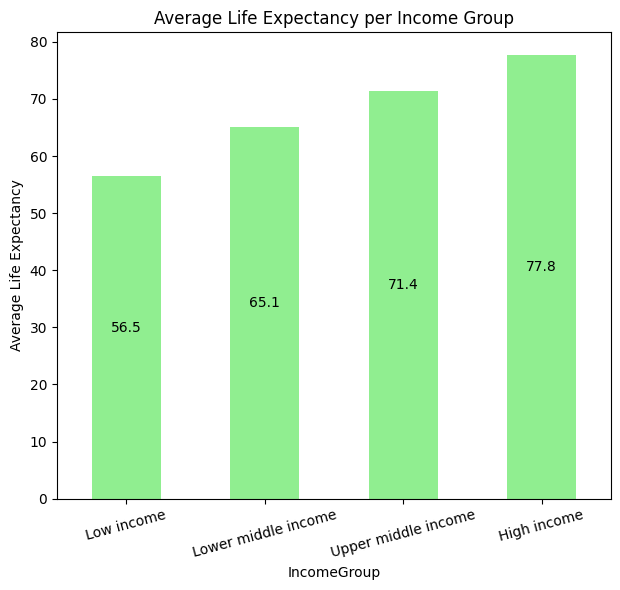

In [59]:
plt.figure(figsize=(12, 6))

# Bar plot for average life expectancy per income group
in_bar = plt.subplot(1, 2, 2)
ax = df.groupby('IncomeGroup')['Life Expectancy World Bank'].mean().sort_values().plot(kind='bar', color='lightgreen')
# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}",  # Format to 1 decimal place
        (p.get_x() + p.get_width() / 2., p.get_height() / 2),  # Position (center of bar, top)
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(0, 7),  # Offset from bar (x,y)
        textcoords='offset points',
        fontsize=10
    )

plt.title('Average Life Expectancy per Income Group')
plt.ylabel('Average Life Expectancy')
plt.xticks(rotation=15)
plt.tight_layout()
in_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'bar_avg_income.png'),bbox_inches='tight', dpi=300)


#### IV. Time Series analysis

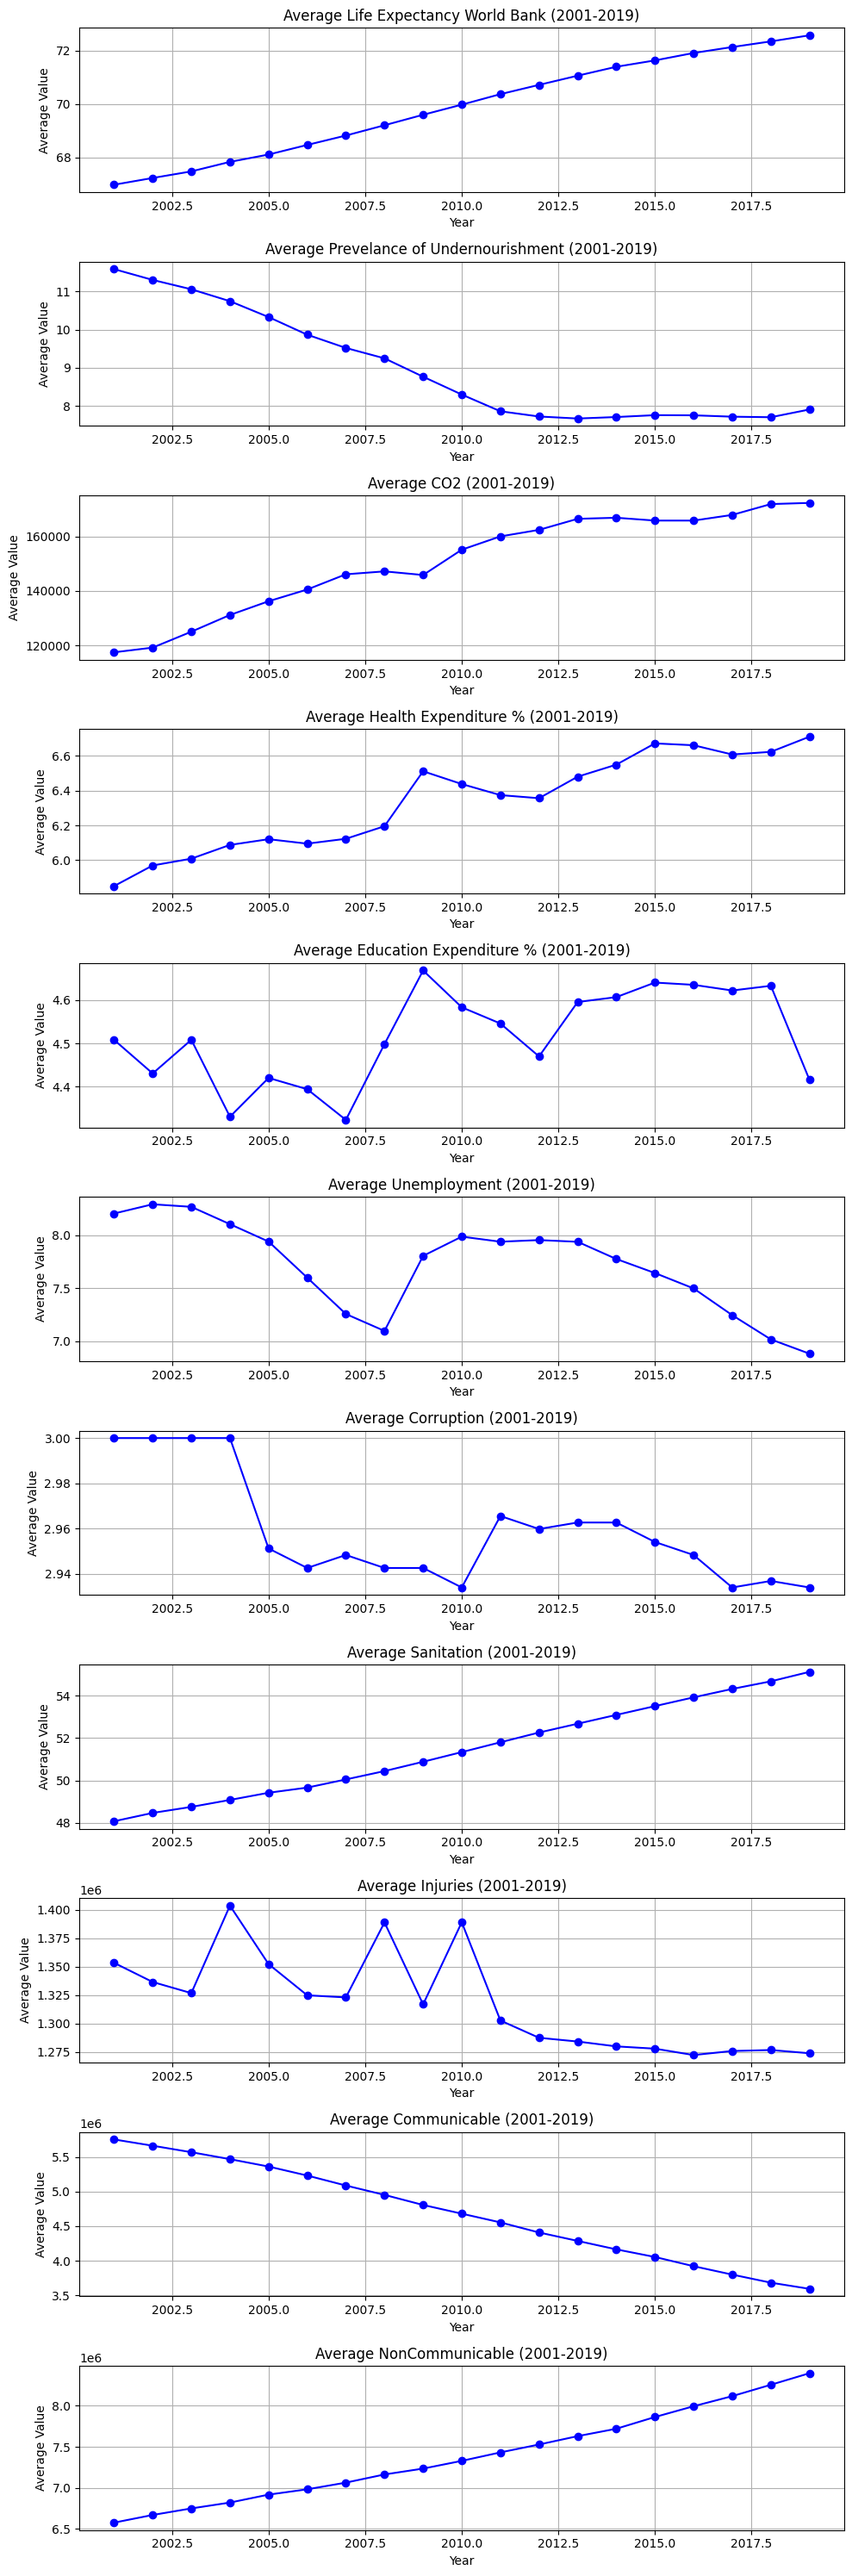

In [61]:
# List of all numerical features except 'Year'
numerical_features = [
    "Life Expectancy World Bank", 
    "Prevelance of Undernourishment", 
    "CO2", 
    "Health Expenditure %", 
    "Education Expenditure %", 
    "Unemployment", 
    "Corruption", 
    "Sanitation",
    "Injuries",
    "Communicable",
    "NonCommunicable"
]

# Setting up the figure and axes
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(10, 30))

# Plotting time series plots for all numerical features
for i, feature in enumerate(numerical_features):
    df.groupby('Year')[feature].mean().plot(ax=axes[i], kind='line', marker='o', color='b')
    axes[i].set_title(f'Average {feature} (2001-2019)', fontsize=12)
    axes[i].set_ylabel('Average Value')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [63]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'life Expectancy.csv'))

In [65]:
from scipy.stats import pearsonr

pearson_corr, p_value = pearsonr(df['Health Expenditure %'], df['Life Expectancy World Bank'])
print(f"Pearson Correlation: {pearson_corr:.3f}, p-value: {p_value:.3f}")

Pearson Correlation: 0.288, p-value: 0.000


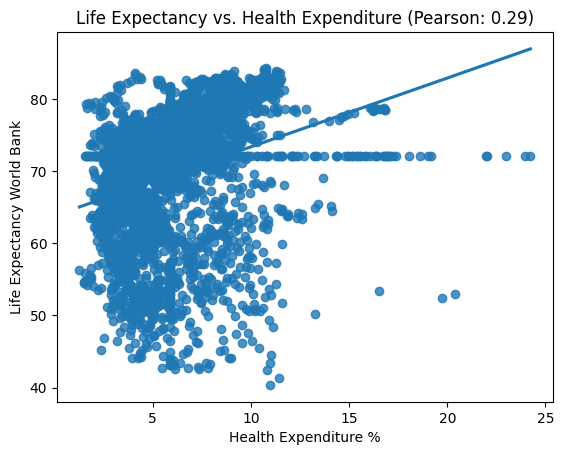

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='Health Expenditure %', y='Life Expectancy World Bank', data=df, ci=None)
plt.title(f"Life Expectancy vs. Health Expenditure (Pearson: {pearson_corr:.2f})")
plt.show()

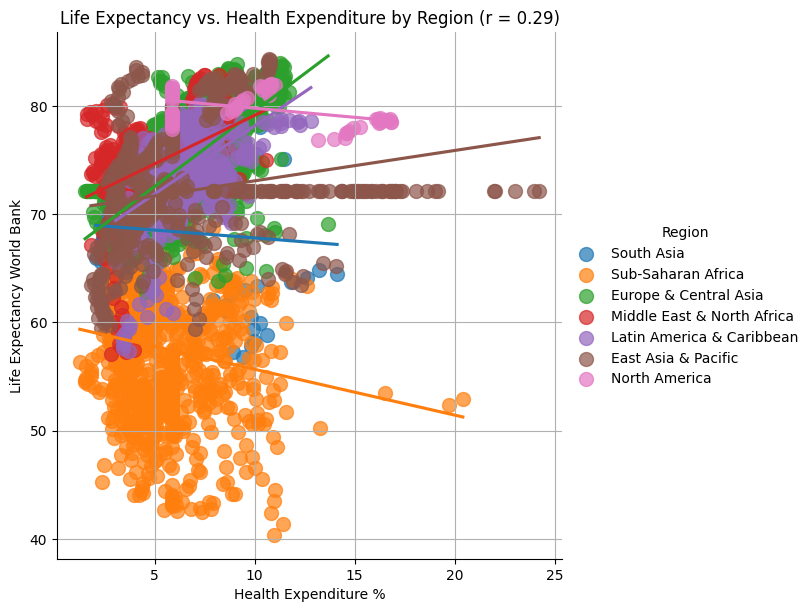

In [69]:
import seaborn as sns

sns.lmplot(
    data=df,
    x="Health Expenditure %",
    y="Life Expectancy World Bank",
    hue="Region",  # Color by region
    ci=None,
    height=6,
    scatter_kws={"s": 100, "alpha": 0.7}
)
plt.title("Life Expectancy vs. Health Expenditure by Region (r = 0.29)")
plt.grid(True)
plt.show()

In [83]:
from plotly.express import scatter
scatter(data_frame=df[df['Year'] == 2019].dropna(subset='Unemployment'),
        x='Prevelance of Undernourishment', y='Life Expectancy World Bank', color='IncomeGroup', size='Unemployment',
        hover_name='Country Name', trendline='ols', trendline_scope='overall')

In [85]:
df.head()

Country Name Country Code                      Region  \
0           Afghanistan          AFG                  South Asia   
1                Angola          AGO          Sub-Saharan Africa   
2               Albania          ALB       Europe & Central Asia   
3               Andorra          AND       Europe & Central Asia   
4  United Arab Emirates          ARE  Middle East & North Africa   

           IncomeGroup  Year  Life Expectancy World Bank  \
0           Low income  2001                     56.3080   
1  Lower middle income  2001                     47.0590   
2  Upper middle income  2001                     74.2880   
3          High income  2001                     72.1685   
4          High income  2001                     74.5440   

   Prevelance of Undernourishment      CO2  Health Expenditure %  \
0                            47.8    730.0              5.892352   
1                            67.5  15960.0              4.483516   
2                             4.9   3230.0              7.139524   
3                             2.5    520.0              5.865939   
4                             2.8  97200.0              2.484370   

   Education Expenditure %  Unemployment  Corruption  Sanitation    Injuries  \
0                 4.371465     10.809000         3.0   49.317481  2179727.10   
1                 4.371465      4.004000         3.0   49.317481  1392080.71   
2                 3.458700     18.575001         3.0   40.520895   117081.67   
3                 4.371465      5.920000         3.0   21.788660     1697.99   
4                 4.371465      2.493000         3.0   49.317481   144678.14   

   Communicable  NonCommunicable  
0    9689193.70       5795426.38  
1   11190210.53       2663516.34  
2     140894.78        532324.75  
3        695.56         13636.64  
4      65271.91        481740.70

#### V. Cluster analysis

In [332]:
### Create datafrane with only numerical columns
df_numcols = df[['Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2', 'Health Expenditure %', 'Education Expenditure %', 'Unemployment', 'Corruption',
                  'Sanitation', 'Injuries', 'Communicable', 'NonCommunicable']]

#### Elbow Technique

In [274]:
df_numcols.head()

Life Expectancy World Bank  Prevelance of Undernourishment      CO2  \
0                     56.3080                            47.8    730.0   
1                     47.0590                            67.5  15960.0   
2                     74.2880                             4.9   3230.0   
3                     72.1685                             2.5    520.0   
4                     74.5440                             2.8  97200.0   

   Health Expenditure %  Education Expenditure %  Unemployment  Corruption  \
0              5.892352                 4.371465     10.809000         3.0   
1              4.483516                 4.371465      4.004000         3.0   
2              7.139524                 3.458700     18.575001         3.0   
3              5.865939                 4.371465      5.920000         3.0   
4              2.484370                 4.371465      2.493000         3.0   

   Sanitation    Injuries  Communicable  NonCommunicable  
0   49.317481  2179727.10    9689193.70       5795426.38  
1   49.317481  1392080.71   11190210.53       2663516.34  
2   40.520895   117081.67     140894.78        532324.75  
3   21.788660     1697.99        695.56         13636.64  
4   49.317481   144678.14      65271.91        481740.70

In [276]:
from sklearn.preprocessing import StandardScaler
df_numcols_scaled = StandardScaler().fit_transform(df_numcols)

In [278]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [280]:
score = [kmeans[i].fit(df_numcols).score(df_numcols) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-4.057732482707276e+18,
 -9.822960937173303e+17,
 -6.397458475168858e+17,
 -3.397322787169736e+17,
 -2.3607615217067e+17,
 -1.7103252473850406e+17,
 -1.4597976631661062e+17,
 -1.04604219027349e+17,
 -8.602836450698982e+16]

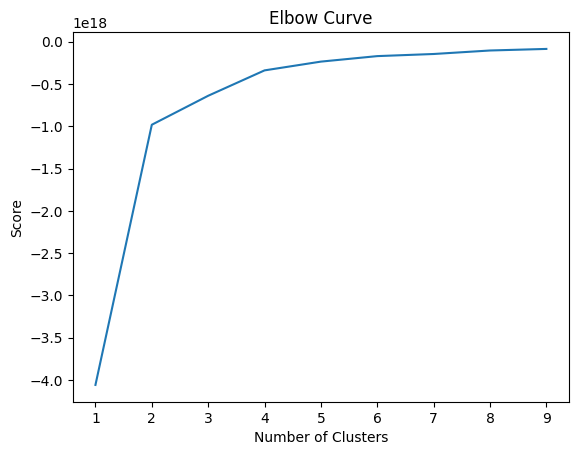

In [282]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### k-means clustering

In [285]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [287]:
# Fit the k-means object to the data.

kmeans.fit(df_numcols)

KMeans(n_clusters=3)

In [289]:
df_numcols['clusters'] = kmeans.fit_predict(df_numcols)

/var/folders/d6/b55202qs51369fgxv1dvzry80000gn/T/ipykernel_48442/2546454280.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [291]:
df_numcols.head()

Life Expectancy World Bank  Prevelance of Undernourishment      CO2  \
0                     56.3080                            47.8    730.0   
1                     47.0590                            67.5  15960.0   
2                     74.2880                             4.9   3230.0   
3                     72.1685                             2.5    520.0   
4                     74.5440                             2.8  97200.0   

   Health Expenditure %  Education Expenditure %  Unemployment  Corruption  \
0              5.892352                 4.371465     10.809000         3.0   
1              4.483516                 4.371465      4.004000         3.0   
2              7.139524                 3.458700     18.575001         3.0   
3              5.865939                 4.371465      5.920000         3.0   
4              2.484370                 4.371465      2.493000         3.0   

   Sanitation    Injuries  Communicable  NonCommunicable  clusters  
0   49.317481  2179727.10    9689193.70       5795426.38         0  
1   49.317481  1392080.71   11190210.53       2663516.34         0  
2   40.520895   117081.67     140894.78        532324.75         0  
3   21.788660     1697.99        695.56         13636.64         0  
4   49.317481   144678.14      65271.91        481740.70         0

In [293]:
df_numcols['clusters'].value_counts()

clusters
0    3154
2     114
1      38
Name: count, dtype: int64

In [219]:
df_numcols.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'lf_numcols.csv'))

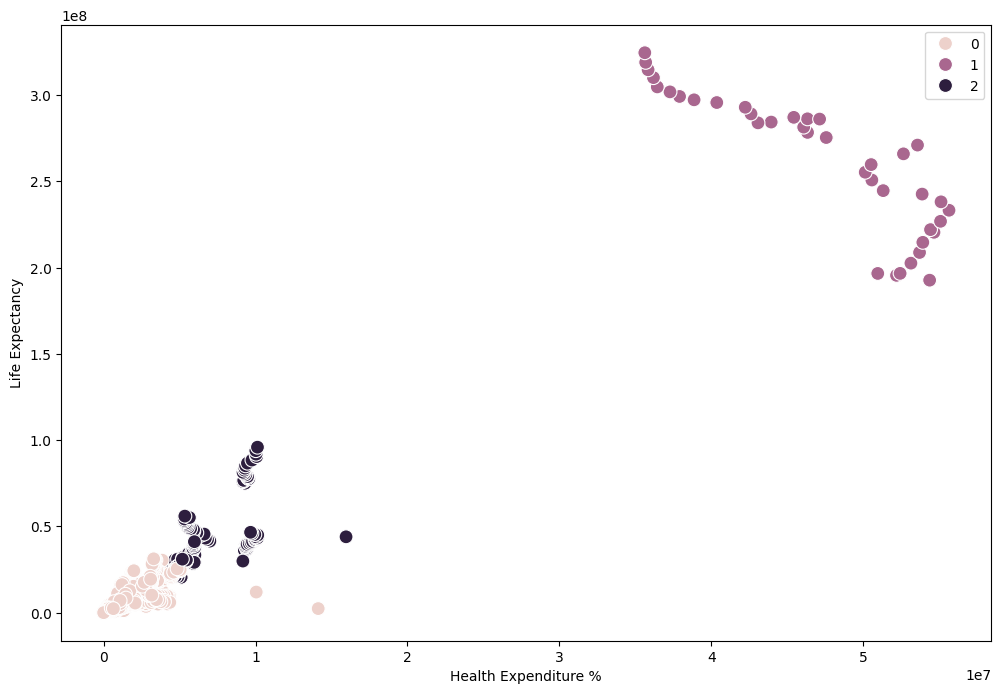

In [295]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numcols['Injuries'], y=df_numcols['NonCommunicable'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Health Expenditure %') # Label x-axis.
plt.ylabel('Life Expectancy') # Label y-axis.
plt.show()

/var/folders/d6/b55202qs51369fgxv1dvzry80000gn/T/ipykernel_48442/3437026122.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



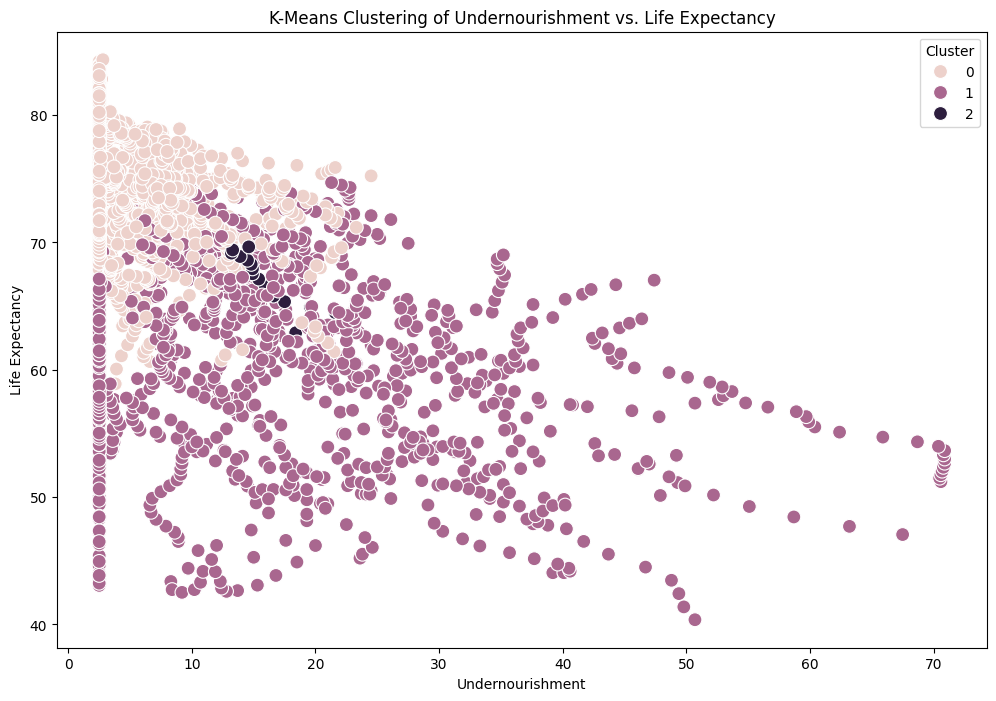

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numcols)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)
df_numcols['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=df_numcols['Prevelance of Undernourishment'], y=df_numcols['Life Expectancy World Bank'], hue=df_numcols['Cluster'], s=100)
ax.grid(False)
plt.xlabel('Undernourishment')
plt.ylabel('Life Expectancy')
plt.title('K-Means Clustering of Undernourishment vs. Life Expectancy')
plt.show()

In [307]:
df_numcols.groupby('clusters').agg({
    'Life Expectancy World Bank': ['mean', 'median'],
    'Prevelance of Undernourishment': ['mean', 'median'],
})

Life Expectancy World Bank          Prevelance of Undernourishment  \
                               mean   median                           mean   
clusters                                                                      
0                         70.000827  72.1685                       8.854629   
1                         70.475447  70.6940                      10.655263   
2                         66.512234  67.7450                      11.734211   

                 
         median  
clusters         
0           3.5  
1          11.6  
2           9.2

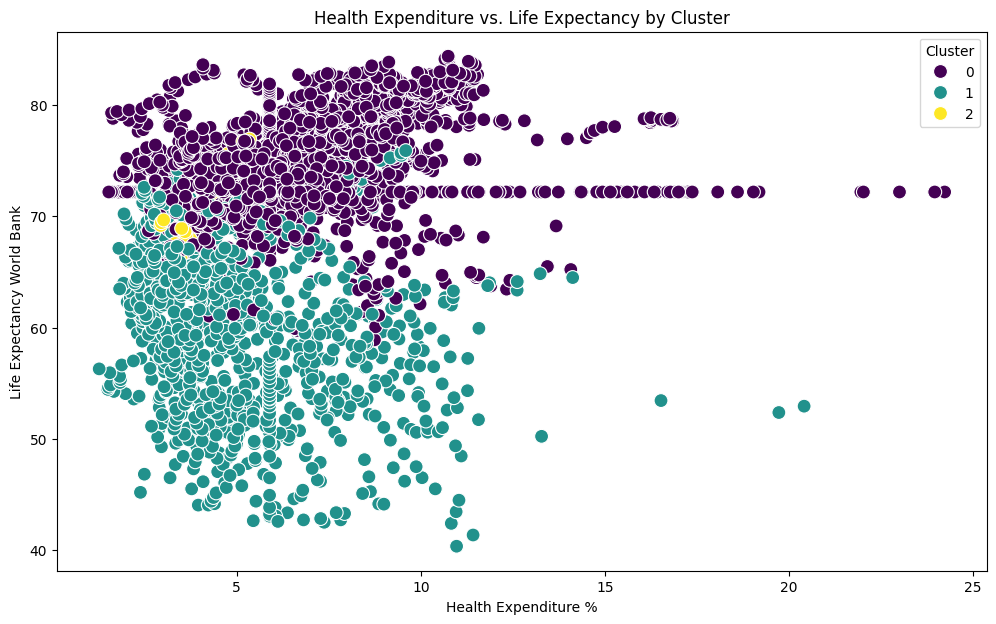

In [309]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='Health Expenditure %', 
    y='Life Expectancy World Bank', 
    hue='Cluster', 
    data=df_numcols, 
    palette='viridis', 
    s=100
)
plt.title('Health Expenditure vs. Life Expectancy by Cluster')
plt.grid(False)
plt.show()

In [315]:
df.head()

Country Name Country Code  Region  IncomeGroup       Year  \
0    Afghanistan          AFG       5            1 2001-01-01   
111       Malawi          MWI       6            1 2001-01-01   
112     Malaysia          MYS       0            3 2001-01-01   
113      Namibia          NAM       6            3 2001-01-01   
114        Niger          NER       6            1 2001-01-01   

     Life Expectancy World Bank  Prevelance of Undernourishment       CO2  \
0                        56.308                            47.8     730.0   
111                      45.204                            23.6     680.0   
112                      72.782                             2.5  129460.0   
113                      51.399                            13.5    2460.0   
114                      50.584                             2.5     670.0   

     Health Expenditure %  Education Expenditure %  Unemployment  Corruption  \
0                5.892352                 4.371465        10.809         3.0   
111              2.385086                 4.508980         5.835         3.0   
112              2.675397                 7.484470         3.530         3.0   
113              9.532120                 6.888870        20.796         3.0   
114              4.758148                 2.279820         1.470         3.0   

     Sanitation    Injuries  Communicable  NonCommunicable  Cluster  \
0     49.317481  2179727.10    9689193.70       5795426.38        0   
111   19.437199   405908.25   10740293.29       1955136.44        0   
112   65.861504   675010.81    1040202.68       3668019.93        0   
113   49.317481    99918.92     901324.95        308421.30        0   
114    6.548758   578147.11   12699015.70       2029328.97        0   

     hierarchical_cluster      PCA1      PCA2  
0                       2  0.530251 -2.647874  
111                     2  0.507495 -3.234028  
112                     0 -0.367856  0.719781  
113                     0 -0.610850 -0.722457  
114                     2  0.505856 -2.265214

In [321]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score


# Preprocess
df['Year'] = df['Year'].astype(int)  # Ensure 'Year' is integer
le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])
df['IncomeGroup'] = le.fit_transform(df['IncomeGroup'])

# Check year range
print("Year range:", df['Year'].min(), "-", df['Year'].max())

# Use random split (80-20) instead of time-based
X = df.drop(['Life Expectancy World Bank', 'Country Name', 'Country Code'], axis=1)
y = df['Life Expectancy World Bank']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Evaluate
preds = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, preds):.2f}")
print(f"R²: {r2_score(y_test, preds):.2f}")

Year range: 978307200000000000 - 1546300800000000000
MAE: 0.88
R²: 0.98
